![](https://i.imgur.com/ZxzJnOo.png)

![](https://i.imgur.com/xL1sGUX.png)

Ainda nesta aula resolveremos (adiante) o exemplo 8.4. Mas, para a resolução deste exercício, necessitamos dos valores de \\(v(0^{+})\\) e \\(\frac{dv(0^{+})}{dt}\\) que, obtidos da resolução do exemplo 8.4, são respectivamente:

\\[
\begin{align}
    v(0^{+}) &= 0 \\\\
    \frac{dv(0^{+})}{dt} &= 98000 \frac{V}{s}
\end{align}
\\]

Para que o circuito seja criticamente amortecido, \\(\alpha^{2} = {\omega_{0}}^{2}\\)

In [5]:
%pip install sympy
import numpy as np
from IPython.display import display, Markdown, Latex
from sympy import *

# definindo parâmetros do circuito:
# R - desconhecido, L = 8H, C = 0.125 \muF
R, L, C = Symbol('R'), 8, 0.125e-6
alpha = 1/(2*R*C)
omega_0 = 1/np.sqrt(L*C)
r = solve(alpha ** 2 - omega_0 ** 2).pop()
alpha = alpha.subs(R, r)

md  = '**letra a)**\n\n'
md += 'O valor de R que resulta em uma resposta criticamente amortecida é: \\\\({r:.0f} \\Omega\\\\)'.format(r = r)
display(Markdown(md))

**letra a)**

O valor de R que resulta em uma resposta criticamente amortecida é: \\(4000 \Omega\\)

In [8]:
# calculando v(t) = (D_1 * t + D_2) * e**(s*t)

# sabemos que v(0) = 0, v'(0) = 98e3, s = - alpha, D_1 = v'(0) - s v(0) e D_2 = v(0)
# por isso, definimos esse parametro
v_0 = 0
dv_0_dt = 98e3
s = - alpha
D_1 = dv_0_dt - s * v_0
D_2 = v_0

# forma geral da EDO da resposta do circuito RLC de segunda ordem
# usando os recursos para calculos de EDO do sympy.
# definimos uma funcao v (em funcao de t) a ser ainda descoberta
v = Function('v')
t = Symbol('t')

# agora definimos a edo de segunda ordem
# v''(t) + (1/rC) v'(t) + (1/LC) v(t) = 0
# para isso, vamos calcular derivadas com o sympy criando para tal
# objetos de derivadas
edo = Derivative(v(t), (t, 2)) + (1/(r*C))*Derivative(v(t), t) + (1/(L*C))*v(t)

# calculando v_t candidata criando uma equacao no sympy através da classe Eq
candidata  =  Eq(v(t), (D_1 * t + D_2) * exp(s * t))

print(candidata)

md  = '**letra b)**\n\n'
# se v_t candidata zerar (resolver) a edo, mostramos a função v(t)
# senão, mostramos que a v_t especulada não resolve.

# isso é muito legal no sympy, podemos verificar se uma função candidata
# resolve uma edo proposta à partir da função checkodesol
# com isso, verificamos que nossa edo proposta v(t) = (D_1 * t + D_2) * e**(s*t)
# é solução do nosso circuito RLC criticamente amortecido
resolve, valor = checkodesol(edo, candidata)
if resolve:
    md += '\\\\({v_t} V, t \geq 0\\\\) caracteriza o sistema RLC'.format(v_t = latex(candidata))
else:
    md += '\\\\({v_t} V, t \geq 0\\\\) não representa o sistema RLC'.format(v_t = latex(candidata))
display(Markdown(md))

Eq(v(t), 98000.0*t*exp(-1000.0*t))


**letra b)**

\\(v{\left(t \right)} = 98000.0 t e^{- 1000.0 t} V, t \geq 0\\) caracteriza o sistema RLC

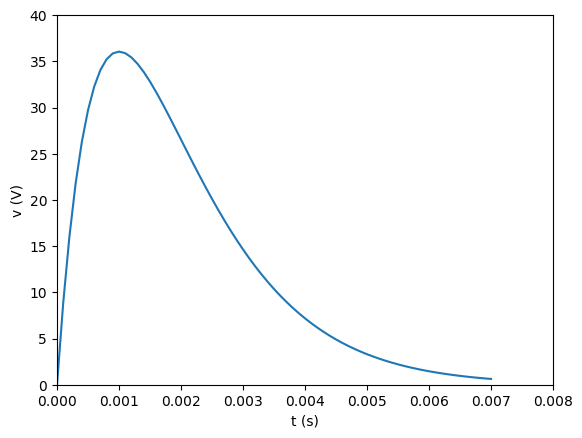

In [10]:
from matplotlib import pyplot as plt

# fazer o gráfico para v(t) onde 0 <= t <= 7ms
v_t = solve(candidata, v(t)).pop()
time_interval = np.linspace(0,0.007,71)
tension_values = np.array([v_t.subs(t, t_prime) for t_prime in time_interval])

plt.xlim([0, 0.008])
plt.ylim([0, 40])
plt.plot(time_interval, tension_values)
plt.xlabel('t (s)')
plt.ylabel('v (V)')
plt.show()